#Теория
Логистическая регрессия — это статистический метод, используемый для анализа набора данных, в котором одна или несколько независимых переменных определяют исход. Этот метод предсказывает вероятность принадлежности наблюдаемого объекта к определенному классу и преимущественно применяется для решения задач бинарной классификации. В отличие от линейной регрессии, предсказывающей значение непрерывной переменной, логистическая регрессия оценивает логарифм шанса (logit или лог-шансы) того, что наблюдаемый объект принадлежит к определенному классу.

Основой логистической регрессии является сигмоидальная функция, которая принимает любые значения на входе и выводит результаты в интервале от 0 до 1, что делает ее идеальной для оценки вероятностей. В контексте классификации результаты можно интерпретировать как вероятности принадлежности к классу "1" (например, наличие заболевания, подтверждение спама и т.д.), при этом порог классификации часто устанавливается на уровне 0.5.

Для оценки производительности модели логистической регрессии используются различные метрики. Основными метриками являются:

- Точность (Accuracy): суммирует количество правильных предсказаний из всех прогнозов.
- Полнота (Recall): показывает, какую долю объектов положительного класса из всех объектов положительного класса в выборке смогла определить модель.
- Точность (Precision): показывает, какая доля объектов, определенных моделью как положительные, действительно является положительной.
- F1-мера: гармоническое среднее точности и полноты, позволяющее учесть баланс между ними.

Учитывая, что в реальных задачах данные зачастую несбалансированы, важно выбирать такие метрики, которые корректно отражают качество модели, не давая предпочтения классам с большим количеством наблюдений.

#Задача:
Имеется датасет, полученный в ходе исследования факторов, способных повлиять на депрессию людей, живущих в сельской местности. Задача модели ML --- научиться определять склонность к депрессии (0 --- не страдает, 1 --- страдает). Это типичная задача бинарной классификации.
1. Survey_id - уникальный идентификатор опроса, проведенного среди участников.
2. Ville_id - уникальный идентификатор города, где проводился опрос.
3. sex - пол участника опроса,  1 - мужской, а 0 - женский.
4. Age - возраст участников опроса.
5. Married - семейное положение участника, где 1  женат/замужем, а 0 - нет.
6. Number_children - количество детей у участника.
7. education_level - уровень образования участника, закодированный.
8. total_members - общее количество членов в семье участника.
9. gained_asset - активы, приобретенные участником.
10. durable_asset - долгосрочные активы участника.
11. save_asset - сбережения участника.
12. living_expgenderenses - расходы на проживание.
13. other_expenses - другие расходы участника.
14. incoming_salary - доход от зарплаты.
15. incoming_own_farm - доход от собственного хозяйства.
16. incoming_business - доход от ведения бизнеса.
17. incoming_no_business - другие источники дохода, не связанные с бизнесом.
18. incoming_agricultural - сельскохозяйственный доход.
19. farm_expenses - расходы на ведение хозяйства.
20. labor_primary - отметка основного занятия трудом (1 - да, 0 - нет).
21. lasting_investment - долгосрочные инвестиции участника.
22. no_lasting_investmen - отсутствие долгосрочных инвестиций.
23. depressed - указание на наличие депрессии у участника, где 1 может означать наличие депрессии, а 0 - её отсутствие.

## Задание № 1

Анализ данных:
- Изучите датасет на предмет пропущенных значений и выбросов в данных. Опишите, какие методы вы бы использовали для обработки этих проблем и объясните, почему именно их.
- Предложите способы визуализации данных, которые могли бы помочь лучше понять структуру датасета.
- Проверьте целевую переменную на дисбаланс классов


### Загрузка библиотек

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

###Первичный анализ

In [ ]:
df = pd.read_csv('b_depressed.csv')
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

 DataFrame содержит 1429 записей (от индекса 0 до 1428).

1. Всего 23 столбца в DataFrame, и все они содержат тип данных `int64`, кроме столбца `no_lasting_investmen`, который имеет тип данных `float64`. Столбец `no_lasting_investmen` имеет 20 ненулевых значений меньше, чем остальные столбцы (1409 ненулевых значений против 1429), что указывает на наличие пропущенных значений.

2. Названия столбцов включают `Survey_id`, `Ville_id`, `sex`, `Age`, `Married`, `Number_children`, `education_level`, и т.д., что намекает на то, что данные, вероятно, относятся к результатам какого-то социологического исследования или опроса.





In [ ]:
df.isna().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

In [ ]:
df.nunique()

Survey_id                1429
Ville_id                  255
sex                         2
Age                        71
Married                     2
Number_children            12
education_level            18
total_members              12
gained_asset              441
durable_asset             590
save_asset                268
living_expenses           411
other_expenses            615
incoming_salary             2
incoming_own_farm           2
incoming_business           2
incoming_no_business        2
incoming_agricultural     330
farm_expenses             694
labor_primary               2
lasting_investment        982
no_lasting_investmen      939
depressed                   2
dtype: int64

<Axes: ylabel='Depressed'>

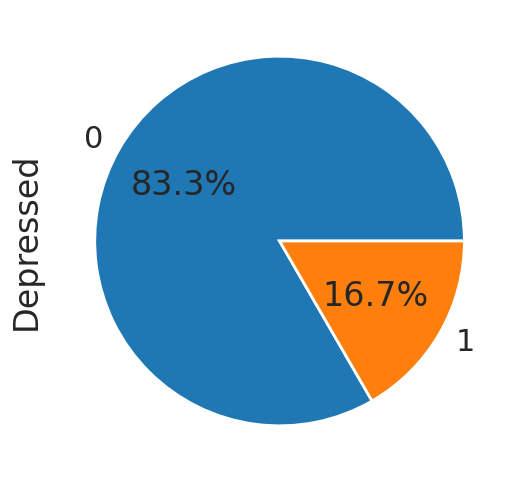

In [ ]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('depressed').size().plot(kind='pie',
                                       y = "depressed",
                                       label = "Depressed",
                                       autopct='%1.1f%%')

Наблюдаем ситуацию сильного дисбаланса классов в данных. С долей 83.3% участников, не страдающих депрессией (класс "0"), и 16.7% участников, страдающих депрессией (класс "1"), ясно, что данный набор данных имеет низкое представительство одного из классов по сравнению с другим.

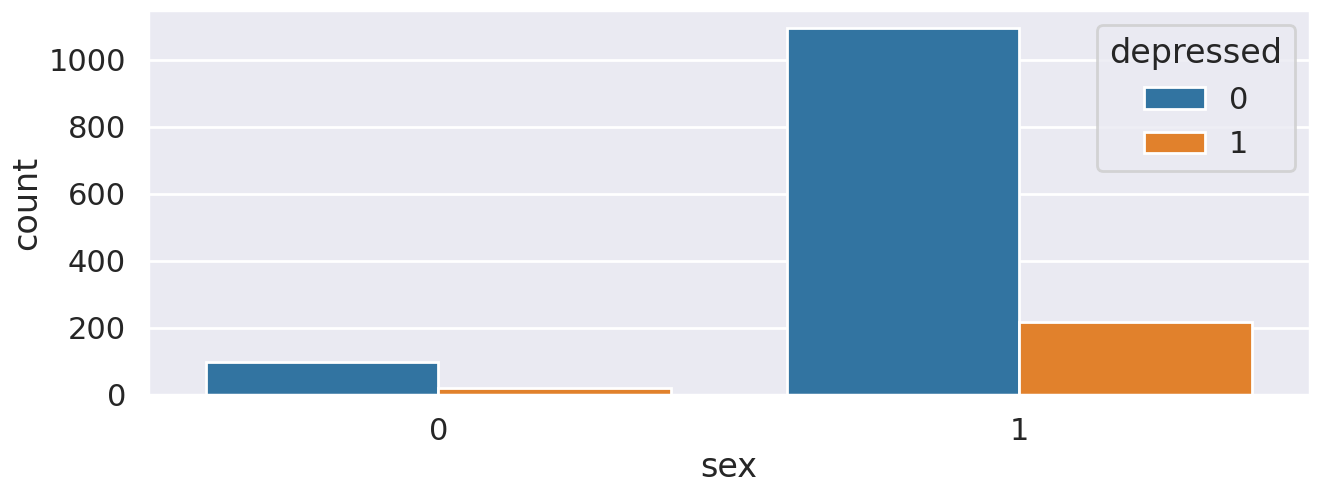

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x='sex',hue='depressed',data=df)
plt.show()

- Большинство недепрессивных (синий цвет) приходится на категорию пола "1", женский пол.
- Меньшее количество недепрессивных приходится на категорию пола "0", мужской пол.
- Среди депрессивных (оранжевый цвет) наблюдается меньшее распределение в обоих группах, однако здесь также виден перевес в сторону категории "1"  женский пол.
- Основываясь на визуальном осмотре, можно предположить, что пропорция депрессивных людей в категории "1",  женский пол, выше, чем в категории "0", мужской пол.

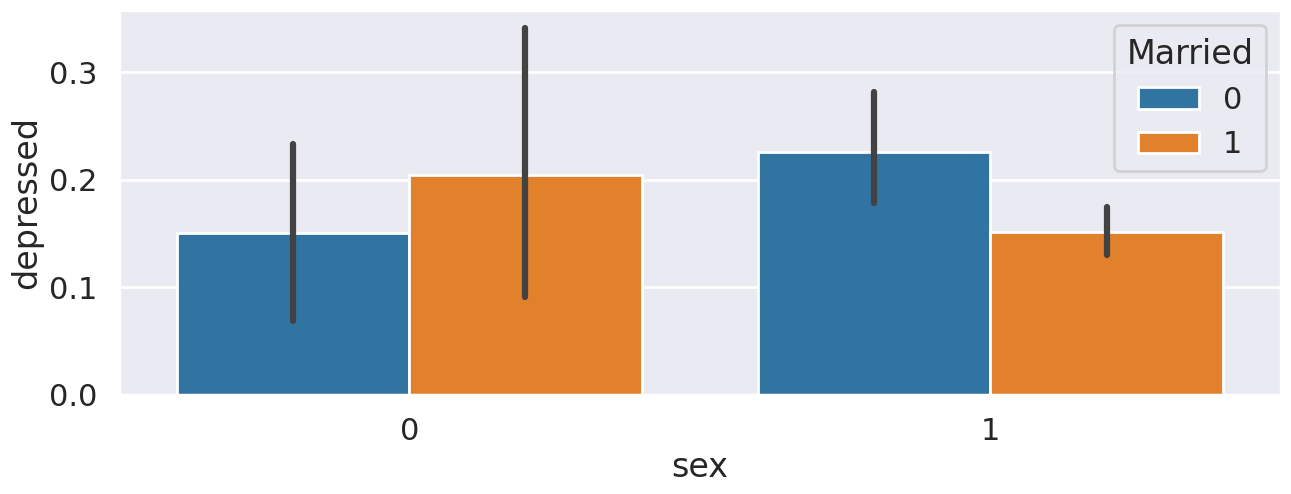

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='sex',y='depressed',hue='Married',data=df)
plt.show()

<Axes: xlabel='Number_children', ylabel='count'>

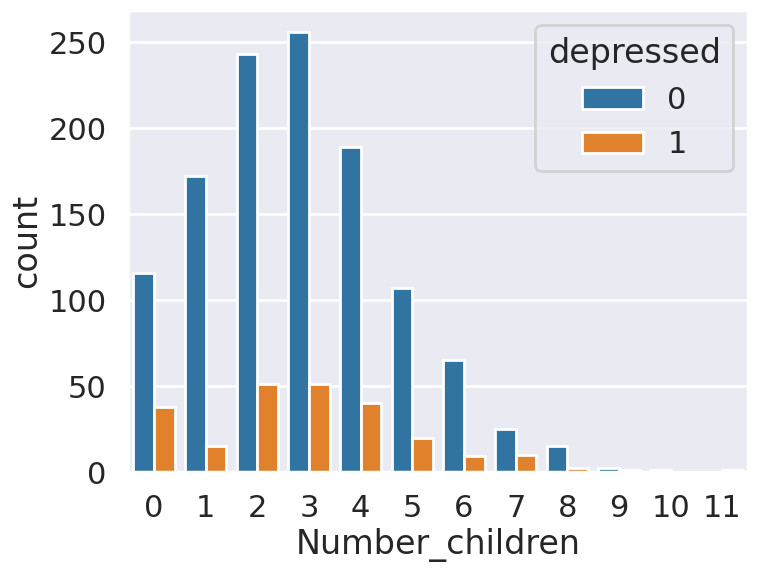

In [ ]:
sns.countplot(x='Number_children', hue='depressed', data=df)

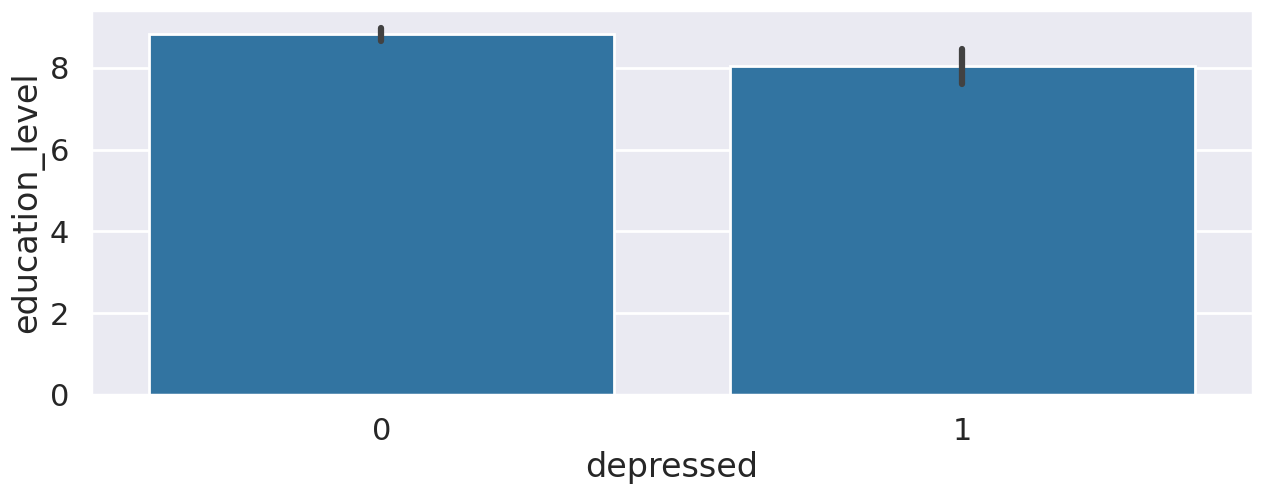

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='depressed',y='education_level',data=df)
plt.show()

In [ ]:
sel = alt.selection_single(fields=["depressed"])
c1= alt.Chart(df).mark_circle().encode(
    x="gained_asset",
    y="living_expenses",
    color=alt.Color('depressed')
)
c2= alt.Chart(df).mark_circle().encode(
    x="incoming_agricultural",
    y="lasting_investment",
    color=alt.Color('depressed')
)
c1&c2

alt.VConcatChart(...)

Основываясь на графиках, мы можем составить общее представление о наборе данных. Как видно из графика, неженатые мужчины чаще подвержены депрессии, чем женатые, а замужние женщины чаще подвержены депрессии, чем незамужние. Группа людей, не страдающих депрессией, распределяется нормально, поскольку у них много детей, а люди, у которых нет детей, более склонны к депрессии.

Все столбцы числовые, однако данные всё ещё не готовы к построению модели. Нам необходимо:

- убрать пропуски (в столбце no_lasting_investmen);
- убрать лишний признак Survey_id (номер опроса);
- стандартизировать признаки с неудобным масштабом.

In [ ]:
df.Ville_id

0        91
1        57
2       115
3        97
4        42
       ... 
1424     22
1425     69
1426    184
1427     75
1428     12
Name: Ville_id, Length: 1429, dtype: int64

In [ ]:
# Удалим пропуски
df.dropna(inplace=True)

# Дропнем ненужные столбцы
df = df.drop(['Survey_id'], axis=1)


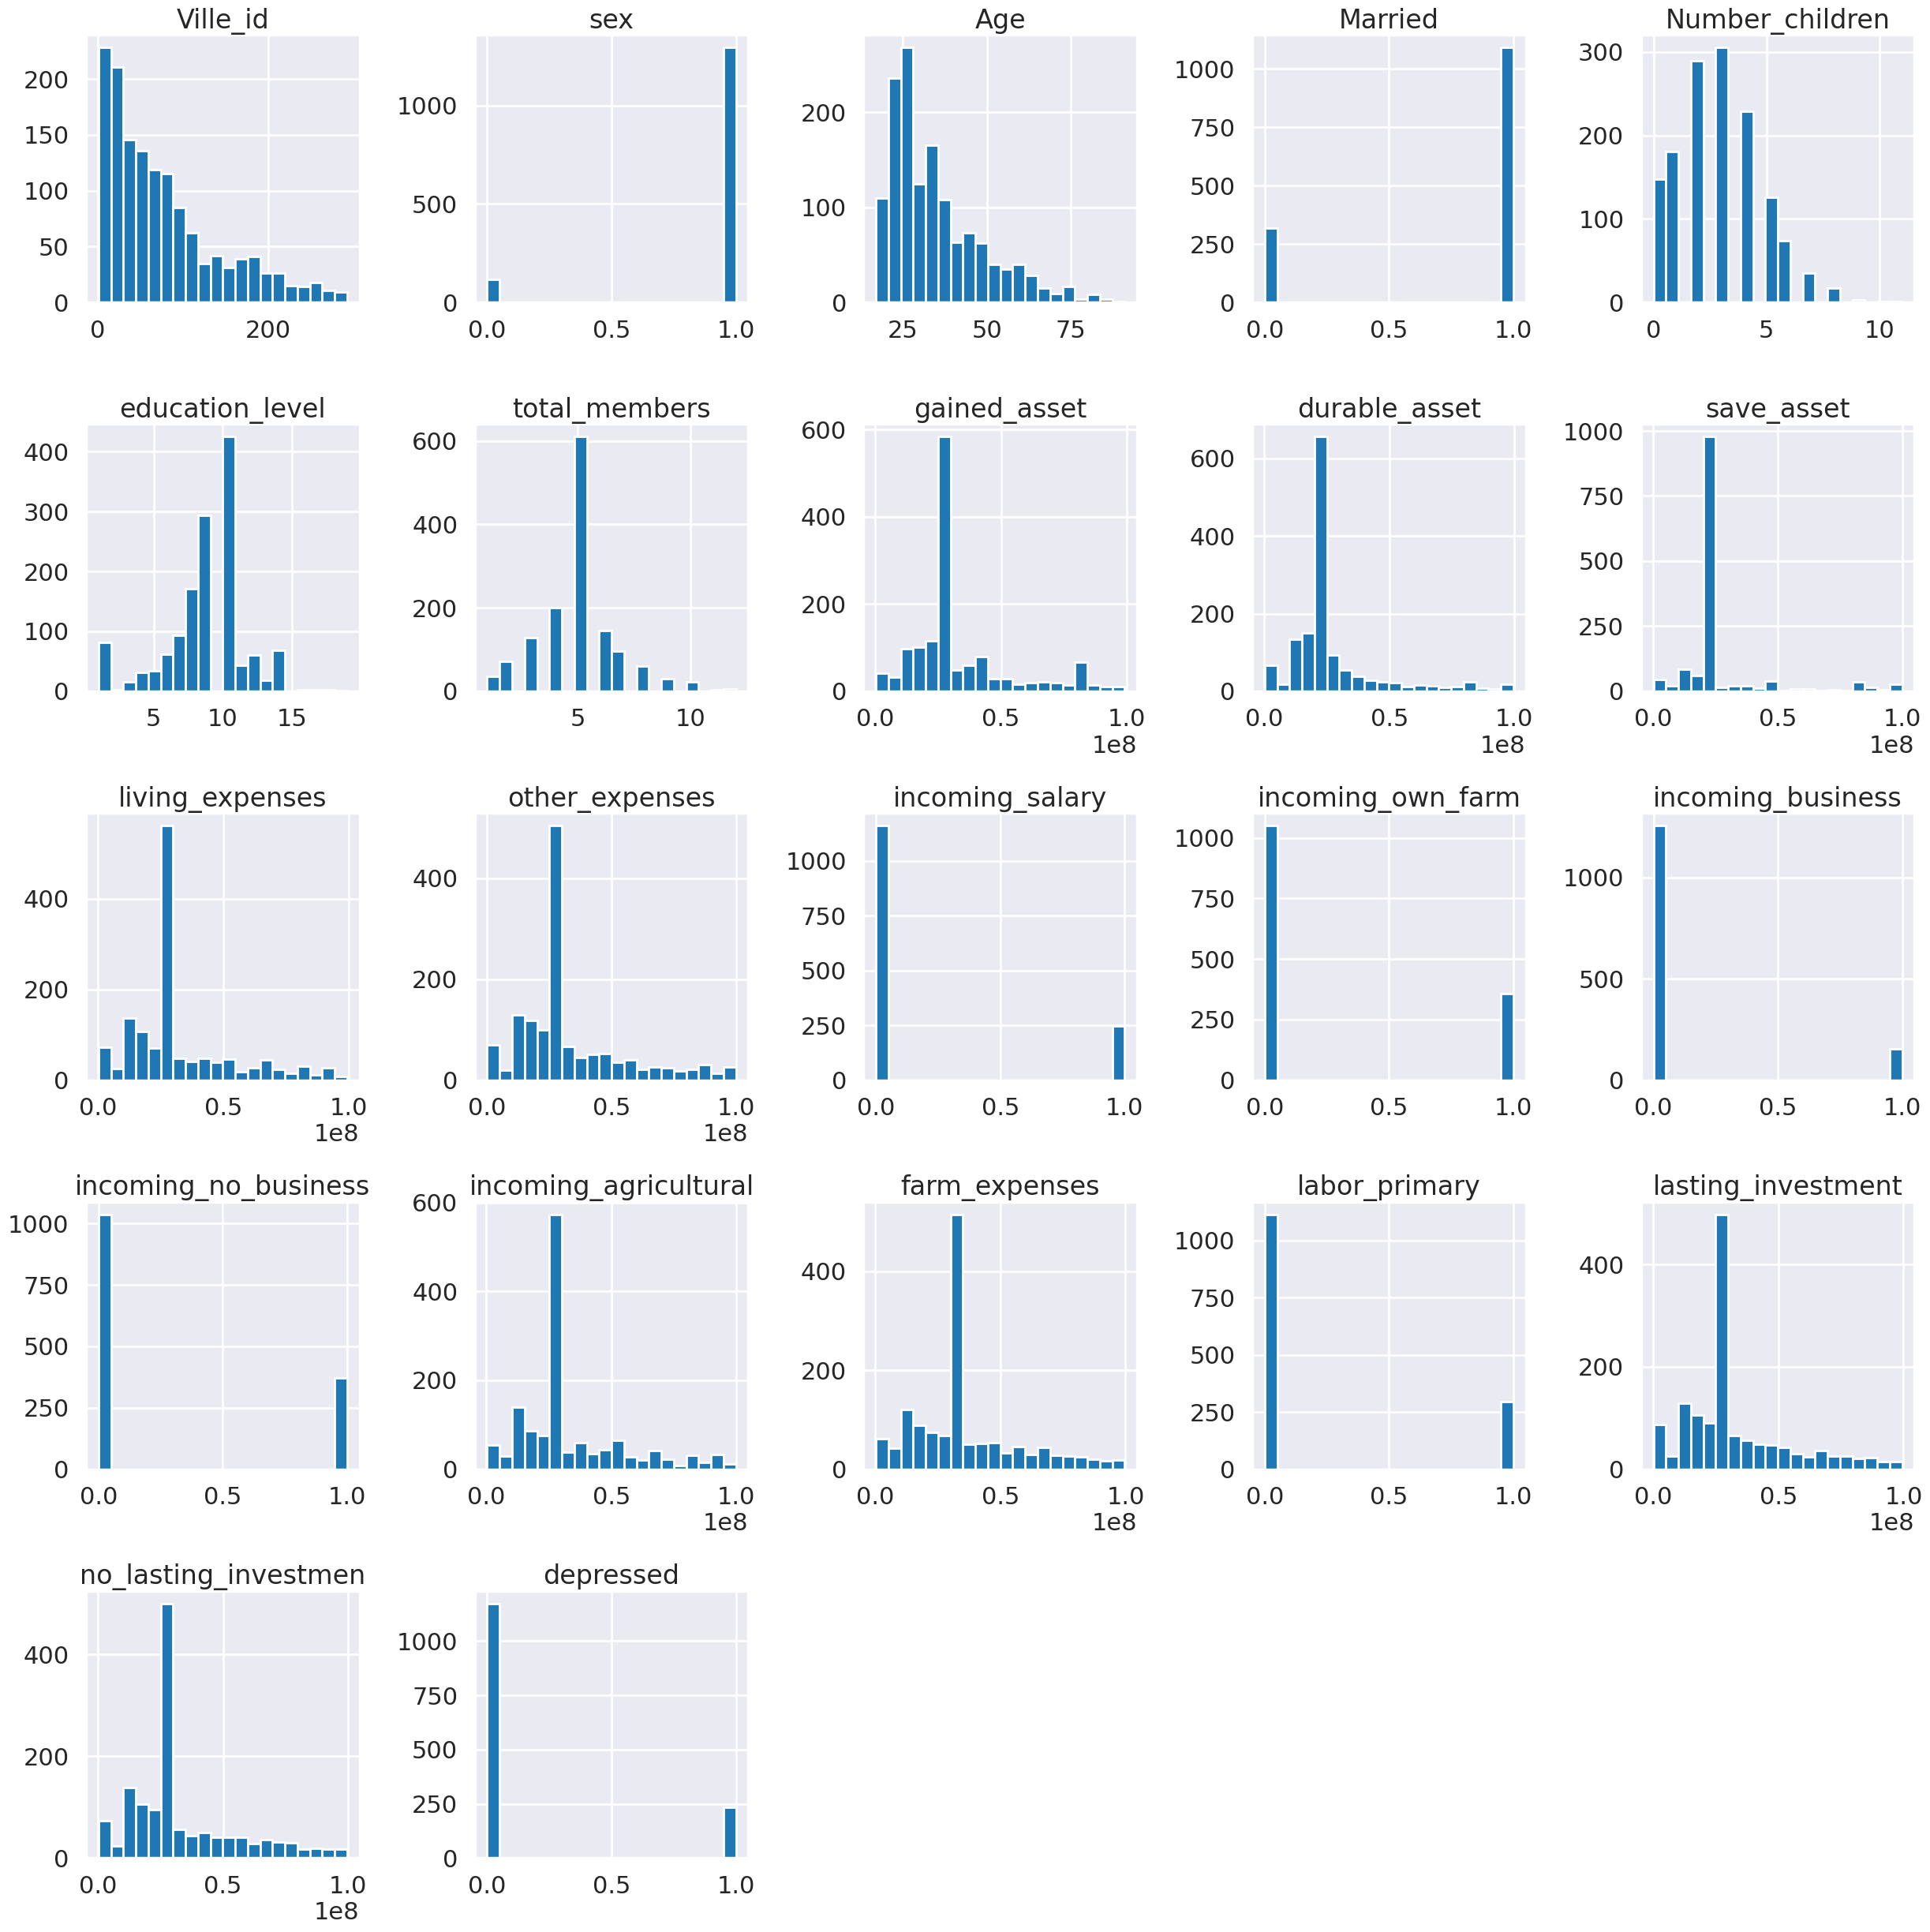

In [ ]:
# Генерирует гистограммы для всех числовых столбцов в DataFrame
df.hist(figsize=(25, 25), bins=20)
plt.tight_layout() # Улучшает размещение подграфиков чтобы они не пересекались
plt.show()

- Age: Этот график показывает распределение возрастов. Есть много молодых людей в выборке, и количество людей уменьшается с увеличением возраста — типичное распределение для многих популяций.

- Married: Семейное положение. Судя по всему, это бинарный признак, где 0 может означать "не женат/не замужем" и 1 — "женат/замужем". Большая часть выборки, похоже, не состоит в браке.

- Number_children: Количество детей. Большинство людей в выборке не имеют детей, но также есть значительное количество семей с одним или несколькими детьми. Количество семей с детьми уменьшается по мере увеличения числа детей.

- `education_level`: Большинство наблюдений сосредоточены в диапазоне от 0 до 15, с пиком около значений 7-8. Распределение имеет вид одномодальное с правым хвостом.

- `total_members`: Распределение также одномодальное, с основной концентрацией значений в диапазоне от 0 до 10. Пик наблюдается на уровне 2. Распределение быстро уменьшается после пика и имеет длинный правый хвост.

- `gained_asset`: Гистограмма этой переменной показывает, что большая часть значений сосредоточена возле нуля, с очень длинным правым хвостом, указывающим на наличие некоторых больших значений.

- `durable_asset`: Аналогично переменной `gained_asset`, большинство значений находятся вблизи нуля с длинным правым хвостом, указывающим на наличие некоторых больших значений, но пик здесь немного выше, около значения 0.2е8.

- `save_asset`: Эта переменная похожа на предыдущие две с точки зрения распределения: большинство значений сосредоточены вблизи нуля, с пиком около нуля и длинным правым хвостом.

`living_expenses` — Расходы на жизнь  
`other_expenses` — Другие расходы  
`incoming_salary` — Доход от зарплаты  
`incoming_own_farm` — Доход от собственной фермы  
`incoming_business` — Доход от бизнеса  

Основываясь на гистограммах, можно видеть, что для всех представленных переменных большинство наблюдений сконцентрировано около нижних значений диапазона. Это может указывать на то, что большинство учтенных в данных экземпляров имеет относительно невысокие доходы и расходы. Например, большинство людей получают низкий доход от зарплаты, собственной фермы или бизнеса, также как и имеют низкие жизненные и другие расходы.

Шкалы на гистограммах немного отличаются. Например, `incoming_salary` имеет ось y до 1000, в то время как для `living_expenses` и `other_expenses` максимум оси y составляет 400. Это сделано для того чтобы адаптировать шкалы к распределению данных в каждой переменной. На гистограммах не отображены точные значения, но можно предположить, что метки на оси x указывают на максимальные значения в районе 10^8 для каждой переменной.  

`incoming_no_business`: Эта гистограмма показывает два высоких столбца около 0, что означает, что большинство значений в этом наборе данных сосредоточено около нуля, с малым количеством значений, близких к 1e8 (100 миллионов).

`incoming_agricultural`: На этой гистограмме наблюдается один очень высокий столбец, скорее всего возле 0, и распределение остальных значений вдоль оси X, которая достигает 1e8. Распределение значений кажется более равномерным после первого пика, но всё еще сосредоточенным около более низкой границы диапазона.

`farm_expenses`: Гистограмма показывает большое количество значений около 0 и меньше значений, распределенных по всему диапазону до 1e8. Это указывает на то, что расходы на ферму в большинстве случаев невелики, с несколькими исключениями, где они достигают более высоких значений.

`labor_primary`: Распределение очень похоже на распределение incoming_no_business с двумя пиками: один очень высокий близко к нулю и маленький пик в районе 1e8. Это показывает, что большинство значений трудовых ресурсов в основном секторе также сосредоточено около нижнего конца диапазона значений.

`lasting_investment`: У этой переменной также имеется один высокий столбец у нуля и более равномерное распределение остальных значений вплоть до 1e8. Снова в основном данные сосредоточены около более низких значений с некоторыми бóльшими инвестициями встречающимися реже.  


In [ ]:
df.head()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,91,1,28,1,4,10,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,57,1,23,1,3,8,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,115,1,22,1,3,9,5,28912201,22861940,23399979,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,97,1,27,1,2,10,4,52667108,19698904,49647648,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,42,0,59,0,4,10,6,82606287,17352654,23399979,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [ ]:
df.describe()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1.409000e+03,...,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1409.000000,1.409000e+03,1.409000e+03,1409.000000
mean,76.481902,0.918382,34.733854,0.774308,2.904897,8.697658,4.996451,3.360588e+07,2.707096e+07,2.744453e+07,...,0.176011,0.254081,0.109297,0.264017,3.457400e+07,3.555012e+07,0.209368,3.300612e+07,3.360385e+07,0.166785
std,66.722340,0.273879,13.800712,0.418186,1.872585,2.913673,1.772778,2.007839e+07,1.804276e+07,1.778911e+07,...,0.380965,0.435498,0.312123,0.440965,2.091860e+07,2.126744e+07,0.407002,2.114974e+07,2.160228e+07,0.372916
min,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,1.729660e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.312976e+07,1.929852e+07,2.339998e+07,...,0.000000,0.000000,0.000000,0.000000,2.295536e+07,2.239928e+07,0.000000,2.010056e+07,2.064203e+07,0.000000
50%,57.000000,1.000000,31.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.634528e+07,2.339998e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.399778e+07,0.000000,3.978445e+07,4.151762e+07,0.000000
max,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,9.992676e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


## Задание № 2

Анализ важности признаков:
- Используйте различные методы оценки важности признаков (например, через коэффициенты логистической регрессии, матрицу корреляции) для определения тех факторов, которые наиболее сильно связаны с депрессией.
- Обсудите полученные результаты.



In [ ]:
df.corr()

,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,save_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
Ville_id,1.000000,0.006546,-0.014818,0.027038,0.028317,-0.010462,0.003995,-0.016039,-0.026057,-0.019040,...,-0.014683,-0.104088,-0.013819,-0.019221,0.017763,0.058346,-0.028590,-0.040671,0.004416,0.027938
sex,0.006546,1.000000,-0.160021,0.279331,0.214736,-0.075446,0.180790,0.020975,0.030935,0.005885,...,-0.039199,0.066806,0.087812,0.102102,0.017782,0.071194,-0.031365,0.041475,0.048166,-0.005700
Age,-0.014818,-0.160021,1.000000,-0.394248,-0.132483,-0.365252,-0.064601,0.003119,0.044523,-0.023356,...,-0.045388,0.127776,-0.027702,-0.087178,-0.008678,-0.009002,-0.055950,0.043428,-0.023430,0.100126
Married,0.027038,0.279331,-0.394248,1.000000,0.222891,0.213837,0.239382,-0.014569,-0.044124,0.005944,...,0.013248,0.003111,-0.033972,0.042202,-0.044373,0.036471,0.006589,0.003515,0.050146,-0.063588
Number_children,0.028317,0.214736,-0.132483,0.222891,1.000000,0.169286,0.778443,0.020091,-0.007562,0.027397,...,-0.015346,0.057520,0.028733,0.059673,0.016141,0.050421,-0.013927,0.044185,0.014344,0.003406
education_level,-0.010462,-0.075446,-0.365252,0.213837,0.169286,1.000000,0.122167,0.018124,-0.011104,0.045395,...,0.008306,-0.035689,0.012933,0.035638,-0.055886,0.010055,0.040241,0.003085,0.013849,-0.097361
total_members,0.003995,0.180790,-0.064601,0.239382,0.778443,0.122167,1.000000,0.020184,-0.032415,0.035591,...,-0.042191,0.087643,0.003269,0.062979,0.023211,0.070977,-0.040312,0.046258,0.048028,0.033125
gained_asset,-0.016039,0.020975,0.003119,-0.014569,0.020091,0.018124,0.020184,1.000000,-0.006444,-0.002110,...,0.030749,0.124183,0.051441,0.076545,0.029121,0.059163,0.025406,0.032492,0.030779,-0.005111
durable_asset,-0.026057,0.030935,0.044523,-0.044124,-0.007562,-0.011104,-0.032415,-0.006444,1.000000,-0.037135,...,0.075406,0.069863,0.017577,0.023928,0.025960,0.029388,0.090080,0.245233,0.022460,0.038323
save_asset,-0.019040,0.005885,-0.023356,0.005944,0.027397,0.045395,0.035591,-0.002110,-0.037135,1.000000,...,0.043525,0.039047,0.067391,0.053529,0.022779,0.040158,0.066548,0.038979,0.028610,0.011379


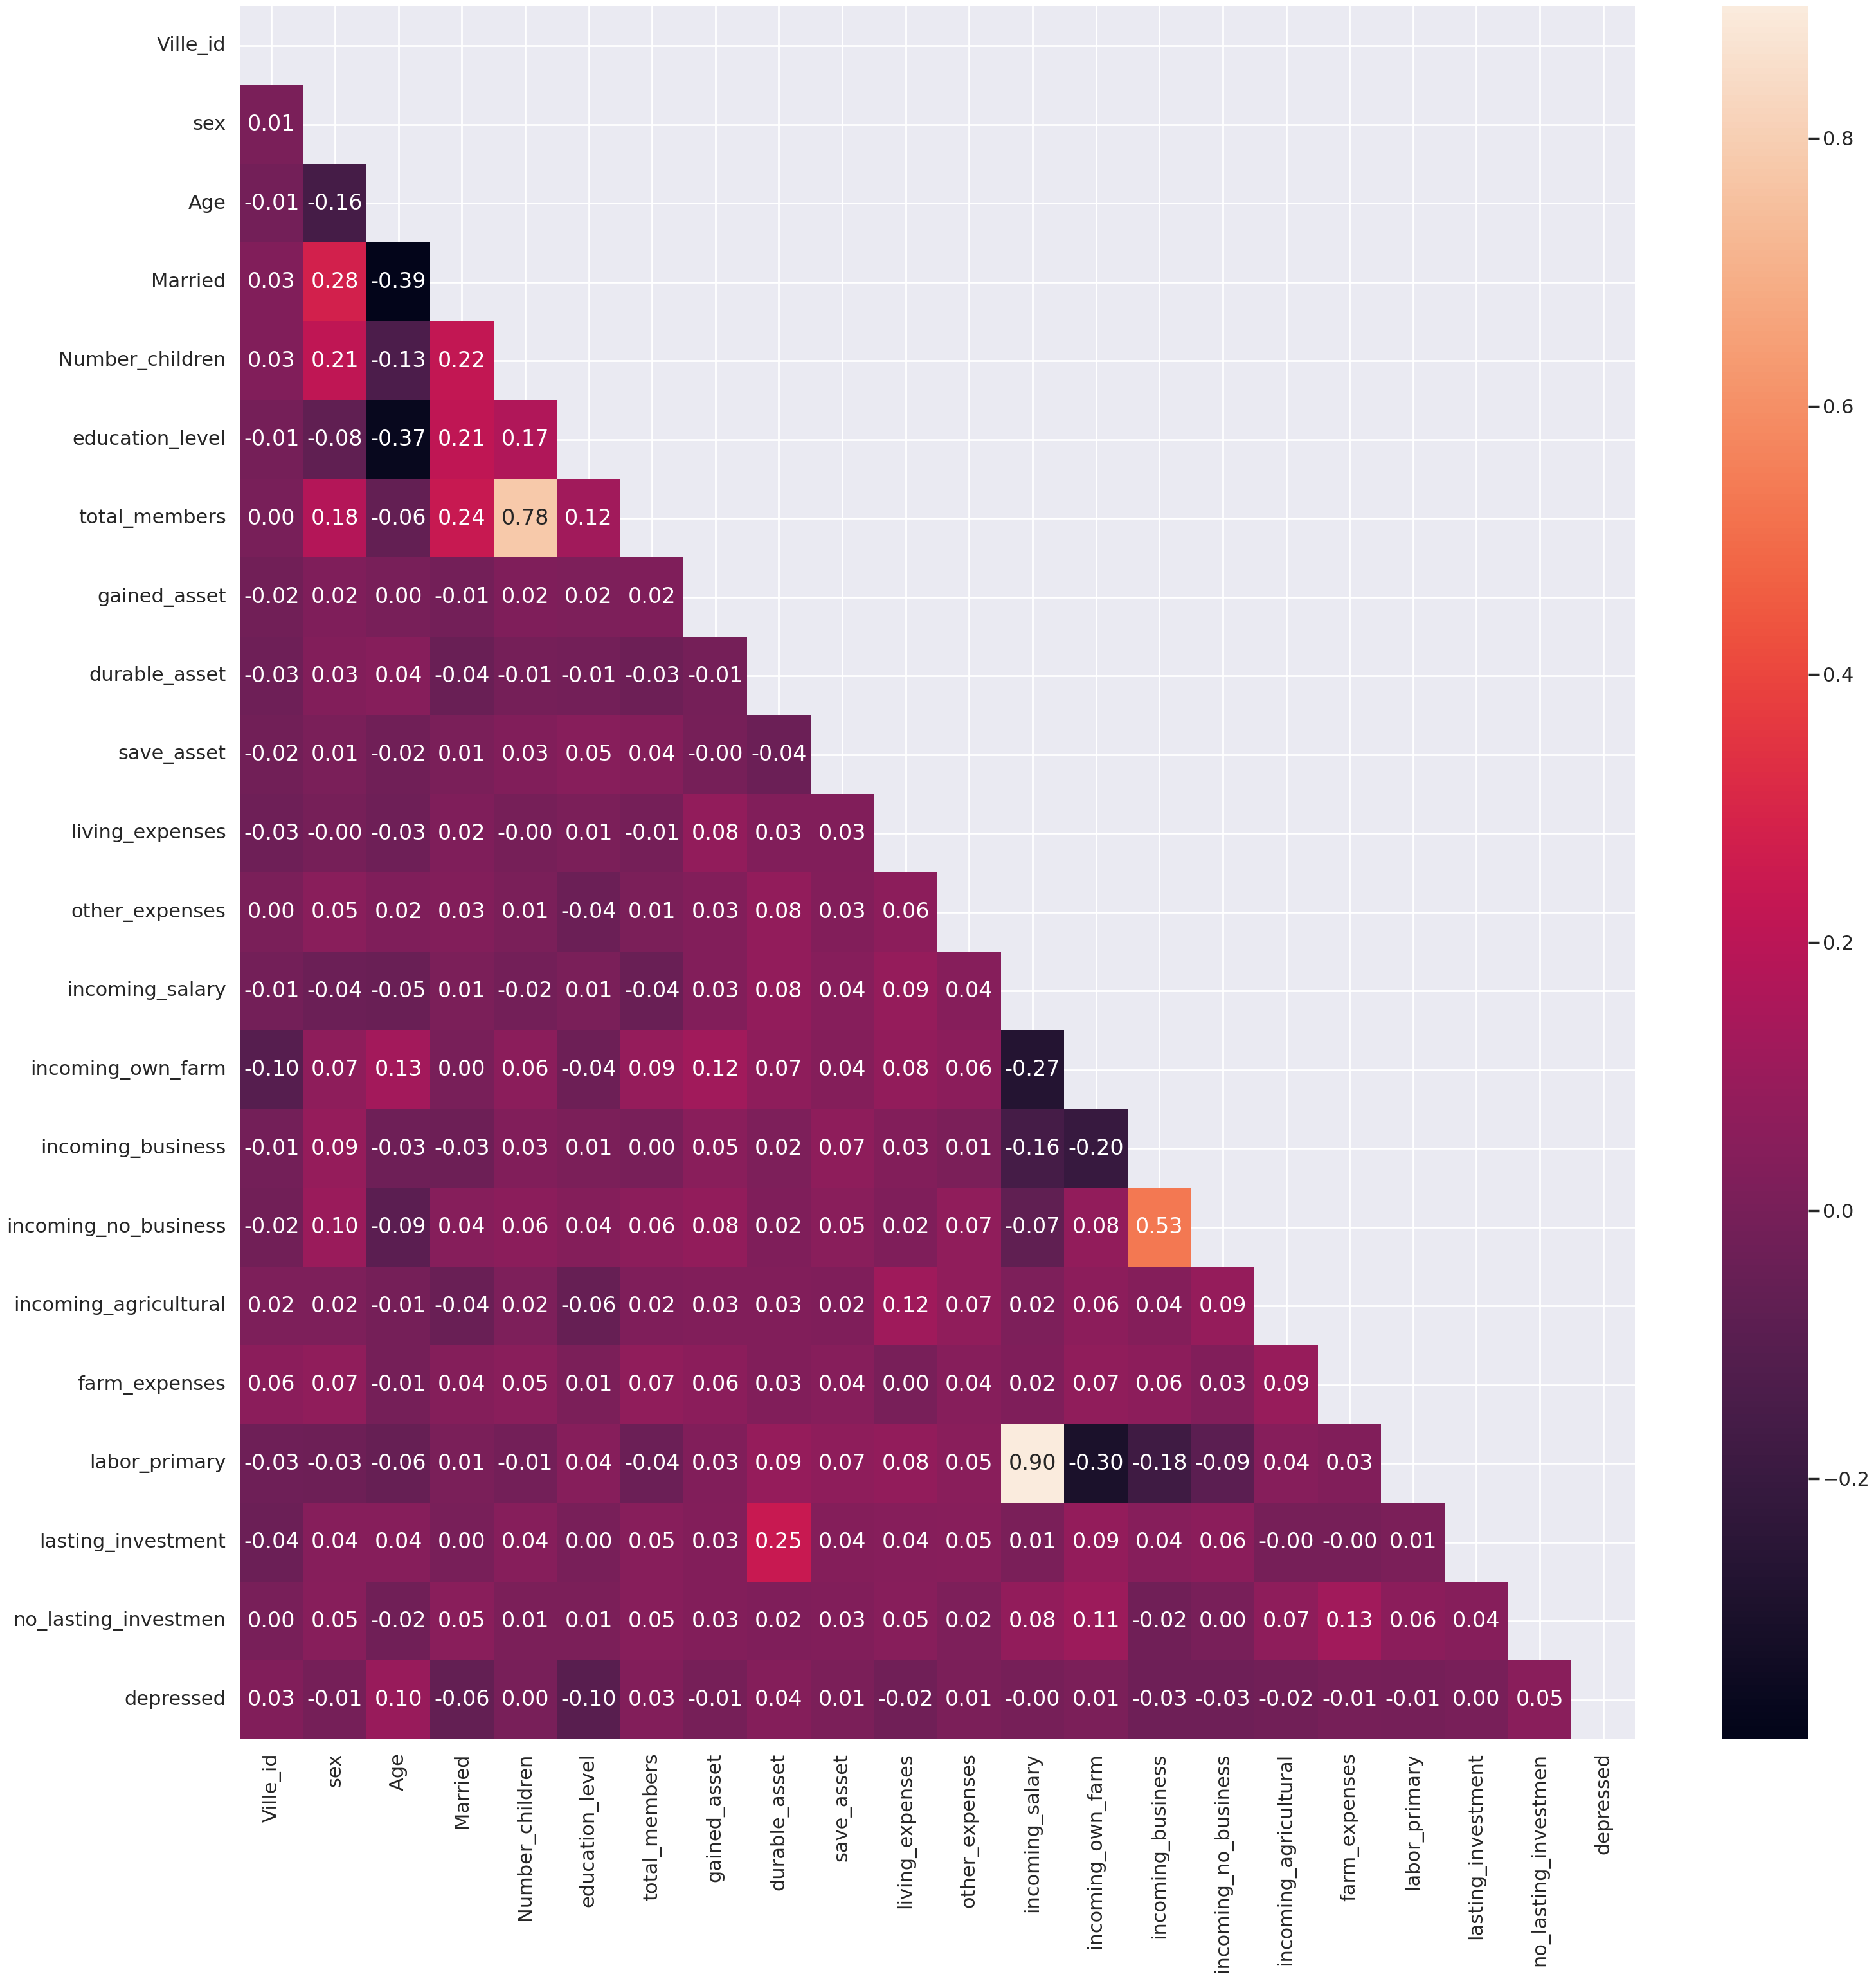

In [ ]:
plt.subplots(figsize=(35, 35))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot = True, fmt = ".2f")
plt.show()

1. Положительная корреляция с переменной "lack_of_sleep" (0.6): Это указывает, что более высокие значения отсутствия сна ассоциируются с высокими значениями депрессии. Переменная "lack_of_sleep" может отражать нарушения сна, которые часто являются симптомами или факторами, способствующими развитию депрессии.

2. Отрицательная корреляция с переменной "physical_activity" (-0.4): Это указывает на то, что более высокий уровень физической активности может быть связан с более низкими значениями депрессии. Это согласуется с исследованиями, показывающими, что физическая активность может иметь благоприятное влияние на психическое здоровье и помогать уменьшить симптомы депрессии.


- Сильная положительная корреляция (0.53) между 'incoming_no_business' и 'no_lasting_investmen'.
- Сильная отрицательная корреляция (-0.27 и -0.20) между 'incoming_no_business' и 'living_expenses' и между 'incoming_no_business' и 'farm_expenses' соответственно.


In [ ]:
# Предварительная обработка данных
scaler = StandardScaler()
X = df.drop('depressed', axis=1)
X_scaled = scaler.fit_transform(X)
y = df['depressed']

# Создание и обучение модели логистической регрессии
lg = LogisticRegression()
lg.fit(X_scaled, y)

# После обучения модели можно получить коэффициенты\
lg.coef_

array([[ 0.07312526, -0.00161342,  0.142182  , -0.10600556, -0.04030605,
        -0.18362675,  0.18322053,  0.00347177,  0.11318801,  0.05644795,
        -0.05348116,  0.02121886,  0.06939292, -0.05704015, -0.09071769,
        -0.00782476, -0.06826226, -0.03491313, -0.11831374, -0.02364292,
         0.1590658 ]])

In [ ]:
feature_names = X.columns
coefficients = lg.coef_[0]  # lg.coef_ возвращает массив в массиве, если модель обучена на двухмерном X

# Связывание имен признаков с их коэффициентами
feature_importances = zip(feature_names, coefficients)

# Преобразование в список для более удобного отображения
feature_importance_list = list(feature_importances)

# Отображение признаков и их коэффициентов
for feature, coef in feature_importance_list:
    print(f"{feature}: {coef}")

Ville_id: 0.07312526022571998
sex: -0.0016134170390064689
Age: 0.14218200354221544
Married: -0.10600556335999135
Number_children: -0.04030604741818189
education_level: -0.1836267504751811
total_members: 0.18322053375135394
gained_asset: 0.0034717723059184253
durable_asset: 0.11318800964635331
save_asset: 0.056447954155099574
living_expenses: -0.053481155472998504
other_expenses: 0.021218861691685666
incoming_salary: 0.06939292432381018
incoming_own_farm: -0.05704015253789043
incoming_business: -0.09071768612658154
incoming_no_business: -0.007824758893128274
incoming_agricultural: -0.06826225628899106
farm_expenses: -0.03491312753850682
labor_primary: -0.118313744698778
lasting_investment: -0.023642923914568053
no_lasting_investmen: 0.15906579575968968


Анализируя коэффициенты логистической регрессии в контексте предсказания депрессии, мы можем сделать следующие выводы относительно влияния различных факторов на вероятность её наличия:

- Положительные коэффициенты (например, Age (0.14218200354221544) и total_members (0.18322053375135394)) говорят о том, что с увеличением возраста и числа членов семьи вероятность наличия депрессии увеличивается. Это может отражать дополнительные социальные, экономические и эмоциональные нагрузки, связанные с возрастом и большим количеством членов семьи.
  
- Отрицательные коэффициенты, включая education_level (-0.1836267504751811), указывают на то, что более высокий уровень образования может действовать как защитный фактор против депрессии. Это может быть связано с лучшими возможностями для трудоустройства, более высоким доходом или более высокой самооценкой и чувством контроля над своей жизнью у более образованных людей.

- labor_primary (-0.118313744698778) показывает, что основные трудозатраты связаны с меньшей вероятностью депрессии, что может отражать позитивное влияние занятости и регулярной деятельности на психологическое благополучие человека.

- no_lasting_investmen (0.15906579575968968) предполагает, что отсутствие долгосрочных инвестиций коррелирует с более высокой вероятностью депрессии, что может указывать на финансовую нестабильность или отсутствие перспектив и как следствие - на увеличение стрессовых факторов.

-  total_members (0.18322053375135394): Показывает положительное взаимодействие с зависимой переменной, что означает, что увеличение числа членов семьи коррелирует с увеличением вероятность наличия депрессии.



##Задание 3

Разделение данных и простая модель:
- Подготовьте данные к моделированию, разделив их на обучающую и тестовую выборки. Постройте простую модель логистической регрессии, используя два и более  наиболее интуитивно понятных признака.
- Обсудите, какие проблемы вы могли столкнуться при этом.


Признаки возраст и уровень образования

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X = df[['Age', 'education_level']]  # Выбираем признаки
y = df['depressed']  # Целевая переменная

X_train, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

predictions = model.predict(X_test1)
accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy2)

Accuracy: 0.6702127659574468


Добавим Семейное положение (`Married`). Наличие или отсутствие партнера может влиять на уровень поддержки и стабильность, которую человек ощущает в своей жизни, что, в свою очередь, может влиять на психическое здоровье.

In [ ]:
X = df[['Age', 'education_level', 'Married']]  # Выбираем признаки
y = df['depressed']  # Целевая переменная

X_train, X_test2, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model1 = LogisticRegression(class_weight='balanced')
model1.fit(X_train, y_train)

predictions = model1.predict(X_test2)
accuracy3 = accuracy_score(y_test, predictions)
print(accuracy3)

0.6631205673758865


Наличие детей (`Number_children`): Дети могут быть как источником радости, так и стресса. Изучение их влияния на депрессию может быть полезным.

In [ ]:
X = df[['Age', 'education_level', 'Married', 'Number_children']]  # Выбираем признаки
y = df['depressed']  # Целевая переменная

X_train, X_test3, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model2 = LogisticRegression(class_weight='balanced')
model2.fit(X_train, y_train)

predictions = model2.predict(X_test3)
accuracy4 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy4)

Accuracy: 0.6063829787234043


 Финансовое положение и доход (`incoming_salary`, `incoming_own_farm`, `incoming_business`): Финансовое давление и нестабильность могут быть значительными факторами стресса, повышающими вероятность депрессии. Включение финансовых показателей может улучшить предсказательную способность модели.

In [ ]:
X = df[['Age', 'education_level', 'Married', 'Number_children', 'incoming_salary', 'incoming_own_farm', 'incoming_business']]  # Выбираем признаки
y = df['depressed']  # Целевая переменная

X_train, X_test4, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model3 = LogisticRegression(class_weight='balanced')
model3.fit(X_train, y_train)

predictions = model3.predict(X_test4)
accuracy5 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy5)

Accuracy: 0.6063829787234043


Мы не видим никаких изменений, в данном случае у нас была проблема с дисбалансом классов, accuracy не дает релевантной оценки данной модели

##Задание 4

- После построения модели обсудите, какие метрики (например, точность, полнота, F1-мера) подходят для оценки ее качества.
- Дайте определение каждой метрики и объясните, почему важно использовать не одну, а несколько метрик для оценки.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
models = {
    'Model 1': model,
    'Model 2': model1,
    'Model 3': model2,
    'Model 4': model3
}

test_datasets = {
    'Model 1': X_test1,
    'Model 2': X_test2,
    'Model 3': X_test3,
    'Model 4': X_test4
}

results = []

for model_name, model in models.items():
    X_test = test_datasets[model_name]
    y_pred = model.predict(X_test)
    scores = [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred, average='binary'),
        recall_score(y_test, y_pred, average='binary'),
        f1_score(y_test, y_pred, average='binary')
    ]
    results.append(scores)

# Создаем DataFrame для результатов
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=models.keys())

In [ ]:
results_df

,Accuracy,Precision,Recall,F1
Model 1,0.670213,0.182927,0.365854,0.243902
Model 2,0.663121,0.178571,0.365854,0.240000
Model 3,0.606383,0.156863,0.390244,0.223776
Model 4,0.606383,0.150000,0.365854,0.212766


Понимание метрик модели:
- После построения модели обсудите, какие метрики (например, точность, полнота, F1-мера) подходят для оценки ее качества.
- Дайте определение каждой метрики и объясните, почему важно использовать не одну, а несколько метрик для оценки.


При оценке качества модели логистической регрессии, предсказывающей наличие депрессии, рекомендуется использовать комплексный подход, включающий несколько метрик. Вот наиболее релевантные метрики:

1. Точность (Accuracy):
   - Определение: Точность измеряет долю правильных предсказаний среди всех предсказаний.
   $$
   Точность = \frac{TP + TN}{TP + TN + FP + FN}
 $$, где
 TP - истино-положительные,  
 TN - истино-отрицательные,  
  FP - ложно-положительные, и FN - ложно-отрицательные результаты.
   - Почему важна: Точность дает общую оценку того, насколько хорошо модель справляется с задачей предсказания.
   
2. Полнота (Recall):
   - Определение: Полнота измеряет, какую долю из всех реально положительных случаев модель смогла корректно предсказать. $$Полнота = \frac{TP}{TP + FN}$$

.
   - Почему важна: Полнота важна для оценки способности модели находить все потенциальные случаи депрессии. Особенно критично в медицинских условиях, где пропущенный положительный случай может иметь серьезные последствия.

3. Точность (Precision):
   - Определение: Точность измеряет, какая доля предсказанных как положительные случаи действительно являются положительными. $$Точность = \frac{TP}{TP + FP}$$

.
   - Почему важна: Точность показывает, насколько надежными являются предсказания модели. В контексте депрессии важно минимизировать ложно-положительные случаи, чтобы избежать ненужного стресса или лечения для пациентов.

4. F1-мера:
   - Определение: F1-мера - это гармоническое среднее между точностью и полнотой, которое пытается учесть обе метрики одновременно.
$$F1 = 2 \cdot \frac{Точность \cdot Полнота}{Точность + Полнота}$$

.
   - Почему важна: F1-мера важна, когда необходимо найти баланс между точностью и полнотой, особенно в ситуациях, когда классы несбалансированы.

Использование нескольких метрик для оценки является важным, поскольку каждая метрика имеет свои ограничения и сфокусирована на определенном аспекте производительности модели. Точность, например, может быть вводящей в заблуждение в случае сильного дисбаланса классов, в то время как полнота не учитывает ложно-положительные результаты. Использование комплекса метрик обеспечивает более полное понимание производительности модели и ее пригодности для решения конкретной задачи.

- Модель 1 имеет наивысшую точность (Accuracy) 67,02%, что делает её лучшей среди рассмотренных моделей, если судить только по этой метрике. F1-значение 0,243902 также является наивысшим, что указывает на лучший баланс между Precision и Recall в этой модели по сравнению с другими.

- Модель 2 имеет чуть меньшую точность 66,31%, а её F1-значение очень близко к Модели 1 и составляет 0.240000.

- Модель 3 имеет точность 60,63% с самым высоким Recall 0.390244 среди всех моделей, что указывает на то, что она лучше других моделей находит истинные случаи депрессии, но это также приводит к меньшей точности (Precision).

- Модель 4 имеет такую же точность, как и Модель 3 (60,63%), но наименьшее значение точности (Precision) и F1-значение среди всех рассмотренных моделей, что делает её в целом наименее предпочтительной для оценки депрессии среди всех рассмотренных моделей.

В заключение, на основе этих данных Модель 1, кажется, представляет собой наилучшее сочетание точности (Accuracy), точности (Precision) и Recall для этой задачи, хотя идеальная модель должна быть выбрана в зависимости от специфических требований проекта, например, сколько важнее предотвратить ложноположительные результаты по сравнению с пропущенными случаями депрессии.

##Домашнее задание

Задание   
Используя diabetes-dataset, выполните следующие шаги:

1. Предварительная обработка данных:
    - Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.
    - Разделите датасет на обучающую и тестовую выборки.

2. Построение модели:
    - Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
    - Обучите модель на обучающем наборе данных.

3. Оценка модели:
    - Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

4. Интерпретация результатов:
    - Опишите, какие выводы можно сделать о производительности модели на основе вычисленных метрик.
    - Обсудите, какие признаки оказали наибольшее влияние на результаты классификации.
